# MatPlotLib and SKLearn

In [1]:
# run these commands if you don't already have the packages installed, otherwise skip
!pip install sklearn
!pip install matplotlib

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

Make a plot of the housing dataset using the geographical information available. Make any additional plots that you feel may be helpful to understand the dataset.

In [3]:
# Looking at the dataset and setting up the dataframe
df_full = fetch_california_housing(as_frame = 1)
#help(fetch_california_housing)
df = df_full.data
target = df_full.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Text(0.5, 1.0, 'Price Heatmap')

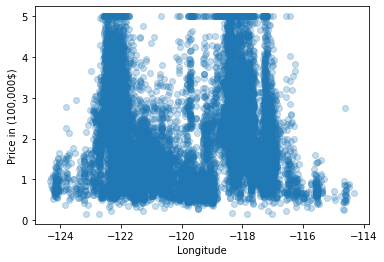

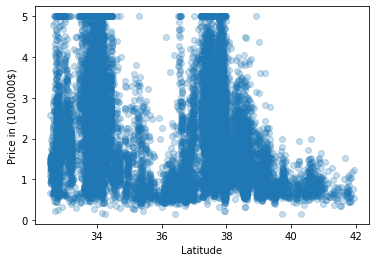

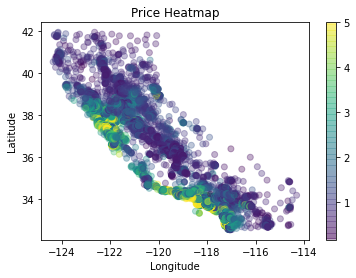

In [4]:
# Plotting

# Longitude by Price
fig, ax = plt.subplots()
ax.set_xlabel('Longitude')
ax.set_ylabel('Price in (100,000$)')
ax = plt.scatter(df["Longitude"],target,alpha=.25)

# Latitude by Price
fig, ax = plt.subplots()
ax.set_xlabel('Latitude')
ax.set_ylabel('Price in (100,000$)')
ax = plt.scatter(df["Latitude"],target,alpha=.25)

# Price Heatmap (not exactly a heatmap but close enough for me)
fig, ax = plt.subplots()
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax = plt.scatter(df['Longitude'],df['Latitude'],c=target,alpha=.3333)
plt.colorbar()
plt.title("Price Heatmap")


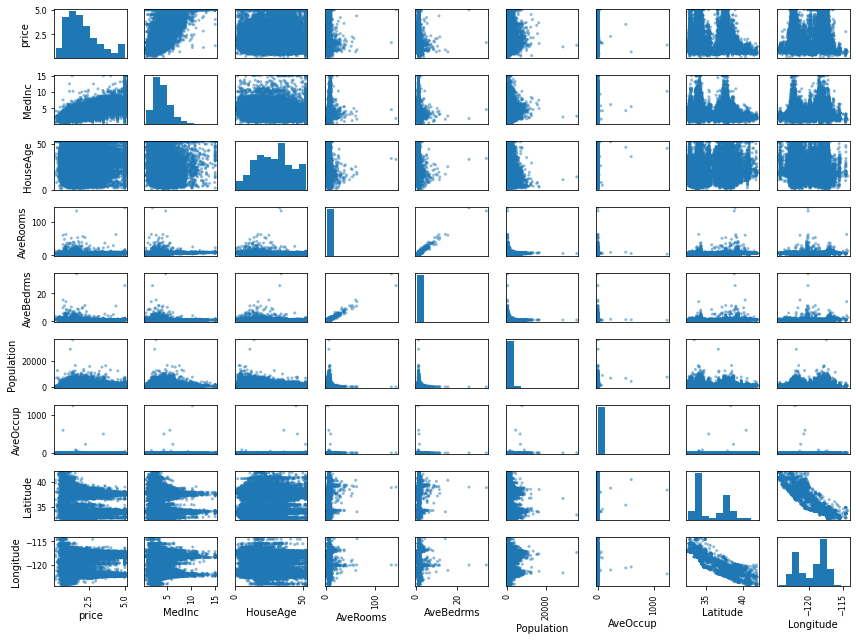

In [5]:
# Get correlation matrix with the price
df.insert(0,"price",target)
axes = pd.plotting.scatter_matrix(df,figsize = (12,9))
plt.tight_layout()

Look at the target of the dataset and build an appropriate model (regression/classification) of your choice. Split the data into a train/test set, fit on the training set and evaluate the model on the test set.

In [6]:
df_full = fetch_california_housing(as_frame = 1)
df = df_full.data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df = df.iloc[:,[0,1,4,6,7]]
#  Rooms Bedrooms and Occupants seem to be correlated with other variables in the dataframe so I will not include them in my regression
df.head()

,MedInc,HouseAge,Population,Latitude,Longitude
0,8.3252,41.0,322.0,37.88,-122.23
1,8.3014,21.0,2401.0,37.86,-122.22
2,7.2574,52.0,496.0,37.85,-122.24
3,5.6431,52.0,558.0,37.85,-122.25
4,3.8462,52.0,565.0,37.85,-122.25


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df, target)

In [10]:
price_model = LinearRegression()
price_model.fit(X_train,y_train)
price_model.coef_

array([ 3.79013054e-01,  8.95588764e-03, -1.59796892e-05, -4.38005172e-01,
       -4.45934810e-01])

In [11]:
preds = price_model.predict(X_test)
print(mean_squared_error(y_test, preds))
print(price_model.score(X_test,y_test))  # R squared

0.5370867235859059
0.6020864646583032


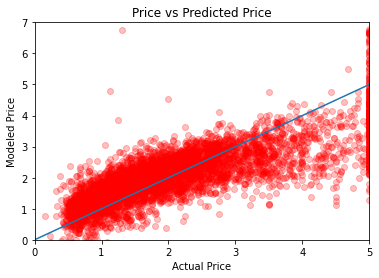

In [12]:
plt.scatter( y_test, preds, color = "red",alpha=.25)
plt.title("Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Modeled Price")
plt.axline((0, 0), slope=1)  # if x=y then the model was correct. This is the line of x=y
plt.xlim(0, 5)
plt.ylim(0, 7)
plt.show()